In [251]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.style'] = 'italic'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.titley'] = 1.05
plt.rcParams['axes.titlepad'] = -40
plt.rcParams['axes.prop_cycle'] = cycler('color', ['#008080', '#DB803D', '#A6A14D', '#82C9B1', '#F3C887', '#DDD99B'])

In [252]:
# Super simple energy functions based on distance
def E_ab(a_pos, b_pos):
    return(-1/(np.linalg.norm(a_pos-b_pos)))

def E_ac(a_pos, c_pos):
    return(-2/(np.linalg.norm(a_pos-c_pos)))

def E_bc(b_pos, c_pos):
    return(0)

In [257]:
# plotting function
def plot_configuration(points, bounds=np.array([[],[]]), kwdict={}):

    fig, ax = plt.subplots()
    plt.axis('scaled')
    x_min = y_min = 1000
    x_max = y_max = -1000
    mid = np.zeros(2)
    
    for p in points:
        ax.scatter(p[0], p[1], s=3200, **kwdict)

        mid += p
        if p[0] > x_max: x_max = p[0]
        if p[0] < x_min: x_min = p[0]
        if p[1] > y_max: y_max = p[1]
        if p[1] < y_min: y_min = p[1]
    
    if len(bounds[0]) == 0:   
        mid /= len(points)
        x_bound = 1.3*max(np.linalg.norm(mid-x_min), np.linalg.norm(mid-x_max))
        y_bound = 1.3*max(np.linalg.norm(mid-y_min), np.linalg.norm(mid-y_max))
        sq_bound = max(x_bound, y_bound)

        ax.set_xbound(mid[0]-sq_bound, mid[0]+sq_bound)
        ax.set_ybound(mid[1]-sq_bound, mid[1]+sq_bound)

    else:
        ax.set_xbound(bounds[0][0], bounds[0][1])
        ax.set_ybound(bounds[1][0], bounds[1][1])            

    ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
    plt.axis('off')
    plt.autoscale(False)

    return (fig, ax)

def draw_lines(ax, p, q, c='k'):
    ax.plot([p[0], q[0]], [p[1], q[1]], c=c, linestyle='--')


Etot = -3.00


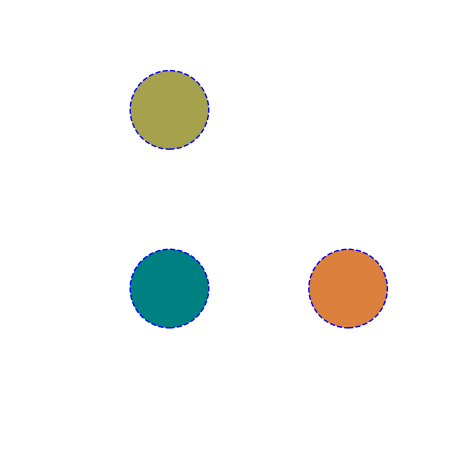

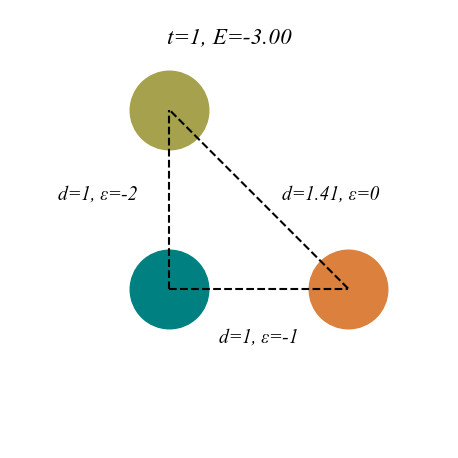

In [258]:
# initialize a system and plot it
a = np.array([0, 0])
b = np.array([1, 0])
c = np.array([0, 1])

# Save an initial one with no annotations as a reference
fig, ax = plot_configuration([a, b, c], kwdict={'edgecolors':'b','linestyle':'--'})
bounds = np.array([ax.get_xbound(), ax.get_ybound()])
plt.tight_layout()
plt.savefig('t0_no_annot.png', dpi=300, transparent=True)

eab = E_ab(a, b)
eac = E_ac(a, c)
ebc = E_bc(b, c)
E = eab+eac+ebc

fig, ax = plot_configuration([a, b, c], bounds)
draw_lines(ax, a, b)
draw_lines(ax, a, c)
draw_lines(ax, b, c)

ax.annotate(f"d={np.linalg.norm(a-b):.0f}, ε={eab:.0f}", np.mean([a, b], axis=0)-[0, 0.3], ha='center')
ax.annotate(f"d={np.linalg.norm(a-c):.0f}, ε={eac:.0f}", np.mean([a, c], axis=0)-[0.4, 0], ha='center')
ax.annotate(f"d={np.linalg.norm(b-c):.2f}, ε={ebc:.0f}", np.mean([b, c], axis=0)+[0.4, 0], ha='center')

ax.set_title(f't=1, E={E:.2f}')



plt.tight_layout()
plt.savefig('t0.png', dpi=300, transparent=True)

print(f"Etot = {eab+eac+ebc:.2f}")

Etot = -3.81


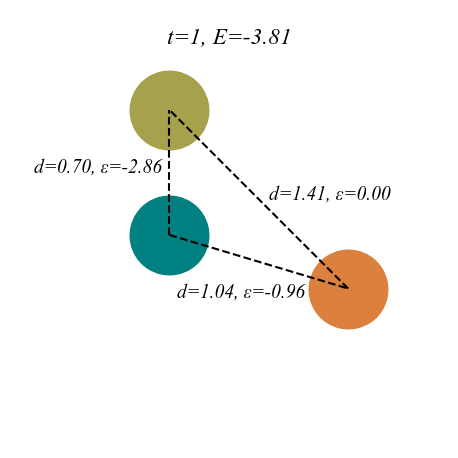

In [255]:
# initialize a system and plot it
a = np.array([0, 0.3])
b = np.array([1, 0])
c = np.array([0, 1])
a_old = np.array([0, 0])

eab = E_ab(a, b)
eac = E_ac(a, c)
ebc = E_bc(b, c)
E = eab+eac+ebc

fig, ax = plot_configuration([a, b, c], bounds)
draw_lines(ax, a, b)
draw_lines(ax, a, c)
draw_lines(ax, b, c)

ax.annotate(f"d={np.linalg.norm(a-b):.2f}, ε={eab:.2f}", np.mean([a, b], axis=0)-[0.1, 0.2], ha='center')
ax.annotate(f"d={np.linalg.norm(a-c):.2f}, ε={eac:.2f}", np.mean([a, c], axis=0)-[0.4, 0], ha='center')
ax.annotate(f"d={np.linalg.norm(b-c):.2f}, ε={ebc:.2f}", np.mean([b, c], axis=0)+[0.4, 0], ha='center')

ax.set_title(f't=1, E={E:.2f}')

plt.tight_layout()
plt.savefig('t1_lower.png', dpi=300, transparent=True)
print(f"Etot = {eab+eac+ebc:.2f}")

Etot = -2.81


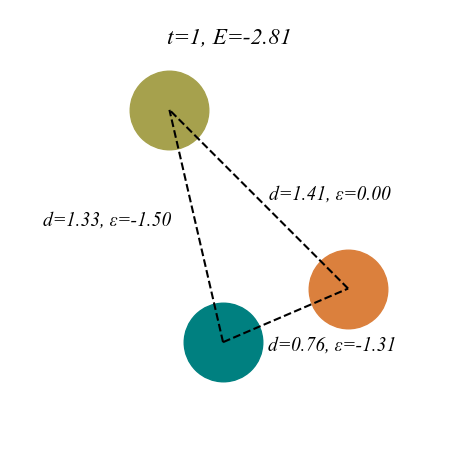

In [256]:
# initialize a system and plot it
a = np.array([0.3, -0.3])
b = np.array([1, 0])
c = np.array([0, 1])
a_old = np.array([0, 0])

eab = E_ab(a, b)
eac = E_ac(a, c)
ebc = E_bc(b, c)
E = eab+eac+ebc

fig, ax = plot_configuration([a, b, c], bounds)
draw_lines(ax, a, b)
draw_lines(ax, a, c)
draw_lines(ax, b, c)

ax.annotate(f"d={np.linalg.norm(a-b):.2f}, ε={eab:.2f}", np.mean([a, b], axis=0)-[0.1, 0.2], ha='left')
ax.annotate(f"d={np.linalg.norm(a-c):.2f}, ε={eac:.2f}", np.mean([a, c], axis=0)-[0.5, 0], ha='center')
ax.annotate(f"d={np.linalg.norm(b-c):.2f}, ε={ebc:.2f}", np.mean([b, c], axis=0)+[0.4, 0], ha='center')

ax.set_title(f't=1, E={E:.2f}')

plt.tight_layout()
plt.savefig('t1_upper.png', dpi=300, transparent=True)
print(f"Etot = {eab+eac+ebc:.2f}")